# Glass Identification

# Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-


1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)


Type of glass is further divided into 7 parts

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps


There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

# Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [87]:
df=pd.read_csv('glass.csv')
df

,id,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [88]:
df.shape

(214, 11)

This dataset contains 214 rows and 11 columns. In which 10 columns are independent column(input) and 1 column(Type of glass) is dependent column(output) column

In [89]:
df.head(10)

,id,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


Here we can see top 10 rows of the dataset.

In [90]:
df.tail(10)

,id,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Type_of_glass
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


Here we can see the last 10 rows of the dataset

# Droping unnessery data from dataset

In [91]:
df.drop('id', axis=1, inplace=True)

In [92]:
df

,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Checking for null values 

In [93]:
#checking for the null values
df.isnull().sum()

RI_refractive_index    0
Na_Sodium              0
Mg_Magnesium           0
Al_Aluminum            0
Si_Silicon             0
K_Potassium            0
Ca_Calcium             0
Ba_Barium              0
Fe_Iron                0
Type_of_glass          0
dtype: int64

<AxesSubplot:>

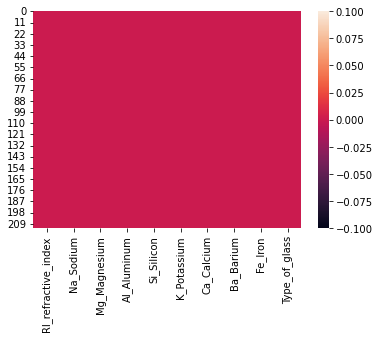

In [94]:
#By visualizing using heatmap
sns.heatmap(df.isnull())

As we can see here there is no blank space on the heatmap so no null values are present in the data set.

# Exploratory Data Analysis(EDA)

In [95]:
df.columns.to_list()

['RI_refractive_index',
 'Na_Sodium',
 'Mg_Magnesium',
 'Al_Aluminum',
 'Si_Silicon',
 'K_Potassium',
 'Ca_Calcium',
 'Ba_Barium',
 'Fe_Iron',
 'Type_of_glass']

Here we can see the names of all the columns

In [96]:
df.dtypes

RI_refractive_index    float64
Na_Sodium              float64
Mg_Magnesium           float64
Al_Aluminum            float64
Si_Silicon             float64
K_Potassium            float64
Ca_Calcium             float64
Ba_Barium              float64
Fe_Iron                float64
Type_of_glass            int64
dtype: object

This dataset has two types of data present in there ['int64', 'float64']

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RI_refractive_index  214 non-null    float64
 1   Na_Sodium            214 non-null    float64
 2   Mg_Magnesium         214 non-null    float64
 3   Al_Aluminum          214 non-null    float64
 4   Si_Silicon           214 non-null    float64
 5   K_Potassium          214 non-null    float64
 6   Ca_Calcium           214 non-null    float64
 7   Ba_Barium            214 non-null    float64
 8   Fe_Iron              214 non-null    float64
 9   Type_of_glass        214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


It is showing the memory used by this dataset, types of data present in the dataset, total number of rows

In [98]:
df.Type_of_glass.nunique()

6

In [99]:
df.Type_of_glass.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [100]:
df.Type_of_glass.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

We can see here that in our target variable there are 6 types of glass present. Where 2nd type of glass which means window type glass present in high amount and 6th type of glass which means non- window glass is present very less.

In [101]:
df.describe()

,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


This will give a brief summary of all the numerical columns present in the dataset=

1. The count for each column is 214 which shows that there is no null value present there.


2. Outliers are present in columns 'Na_Sodium', 'Al_Aluminum','K_Potassium', 'Ca_Calcium', 'Ba_Barium', 'Fe_Iron' because there is a hugh difference in between 75th percentile and max. value. 


3. In column 'Mg_Magnesium' mean is less than median which means the data is skewed to the left. 


4. we can also notice the standard deviation(std.), max., min., 25% percentile, 50% percentile, 75% percentile values from this describe method.

# Data Visualization

# Univarient Analysis

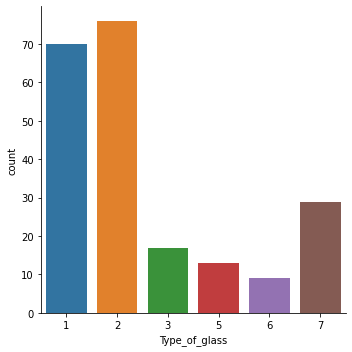

In [102]:
sns.catplot(x='Type_of_glass', data=df, kind='count')

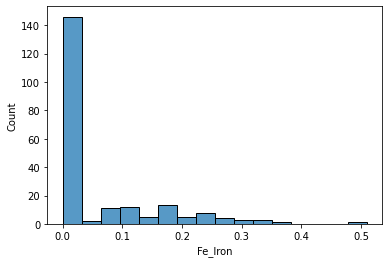

In [103]:
sns.histplot(df['Fe_Iron'])
plt.show()

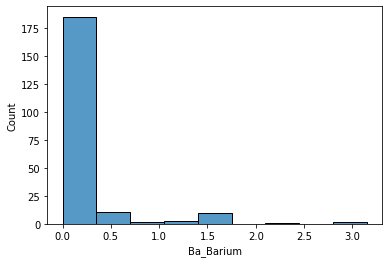

In [104]:
sns.histplot(df['Ba_Barium'])
plt.show()

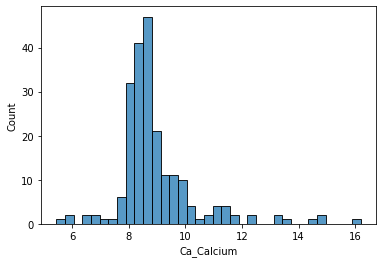

In [105]:
sns.histplot(df['Ca_Calcium'])
plt.show()

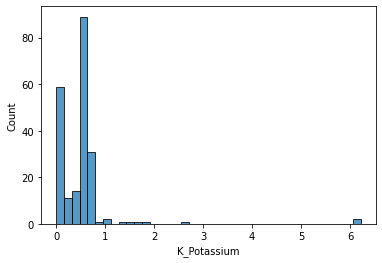

In [106]:
sns.histplot(df['K_Potassium'])
plt.show()

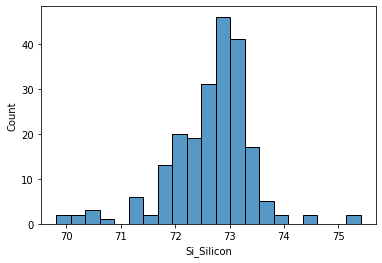

In [107]:
sns.histplot(df['Si_Silicon'])
plt.show()

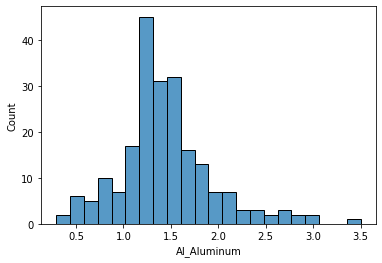

In [108]:
sns.histplot(df['Al_Aluminum'])
plt.show()

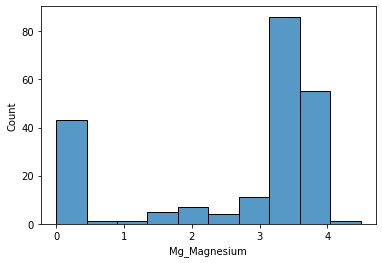

In [109]:
sns.histplot(df['Mg_Magnesium'])
plt.show()

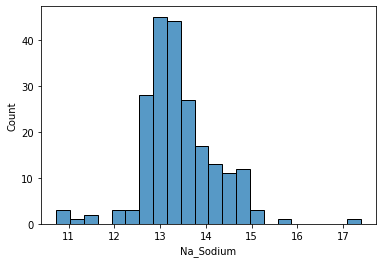

In [110]:
sns.histplot(df['Na_Sodium'])
plt.show()

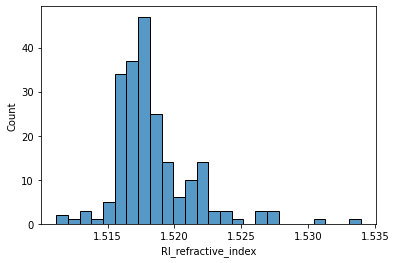

In [111]:
sns.histplot(df['RI_refractive_index'])
plt.show()

# Bivarient analysis

<AxesSubplot:xlabel='Type_of_glass', ylabel='RI_refractive_index'>

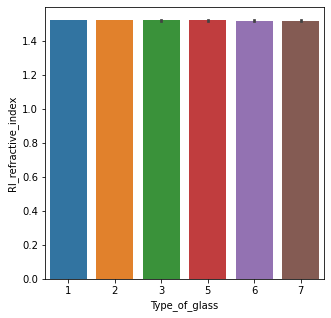

In [112]:
#Type_of_glass vs RI_refractive_index
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type_of_glass', y='RI_refractive_index', data=df)

<AxesSubplot:xlabel='Type_of_glass', ylabel='Na_Sodium'>

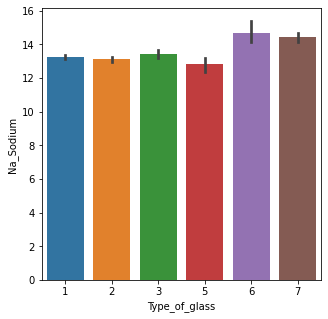

In [113]:
#Type_of_glass vs Na_Sodium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type_of_glass', y='Na_Sodium', data=df)

<AxesSubplot:xlabel='Type_of_glass', ylabel='Mg_Magnesium'>

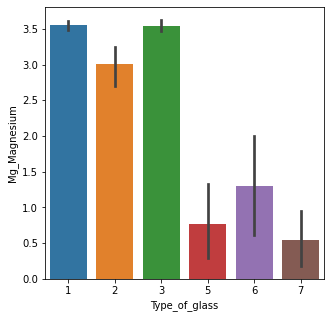

In [114]:
#Type_of_glass vs Mg_Magnesium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type_of_glass', y='Mg_Magnesium', data=df)

<AxesSubplot:xlabel='Type_of_glass', ylabel='Al_Aluminum'>

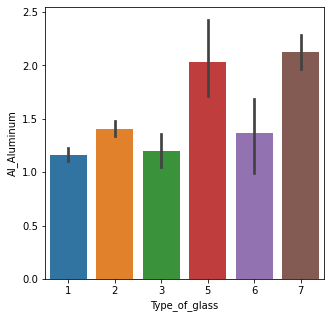

In [115]:
#Type_of_glass vs Al_Aluminum
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type_of_glass', y='Al_Aluminum', data=df)

<AxesSubplot:xlabel='Type_of_glass', ylabel='Si_Silicon'>

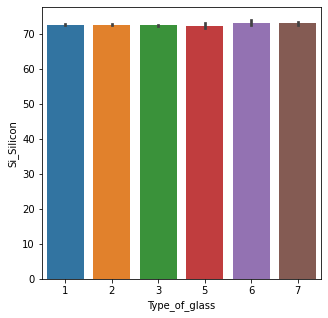

In [116]:
#Type_of_glass vs Si_Silicon
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type_of_glass', y='Si_Silicon', data=df)

<AxesSubplot:xlabel='Type_of_glass', ylabel='K_Potassium'>

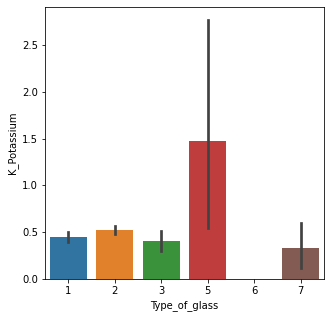

In [117]:
#Type_of_glass vs K_Potassium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type_of_glass', y='K_Potassium', data=df)

<AxesSubplot:xlabel='Type_of_glass', ylabel='Ca_Calcium'>

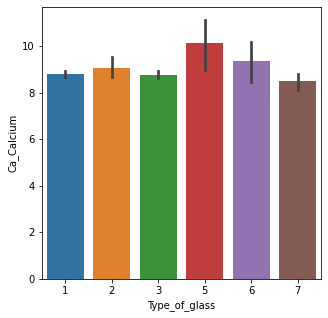

In [118]:
#Type_of_glass vs Ca_Calcium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type_of_glass', y='Ca_Calcium', data=df)

<AxesSubplot:xlabel='Type_of_glass', ylabel='Ba_Barium'>

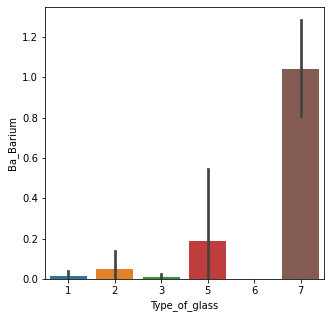

In [119]:
#Type_of_glass vs Ba_Barium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type_of_glass', y='Ba_Barium', data=df)

<AxesSubplot:xlabel='Type_of_glass', ylabel='Fe_Iron'>

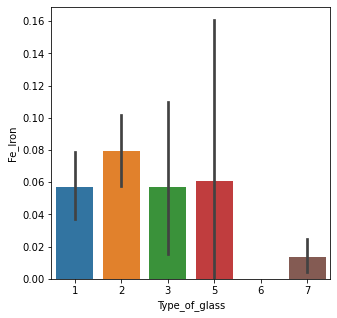

In [120]:
#Type_of_glass vs Fe_Iron
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type_of_glass', y='Fe_Iron', data=df)

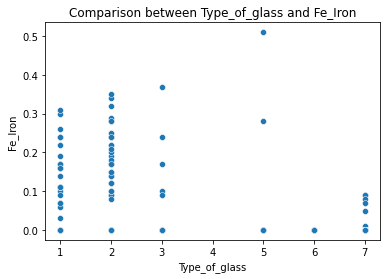

In [121]:
plt.title('Comparison between Type_of_glass and Fe_Iron')
sns.scatterplot(x='Type_of_glass',y='Fe_Iron', data=df, palette='bright')
plt.show()

# Multivarient Analysis

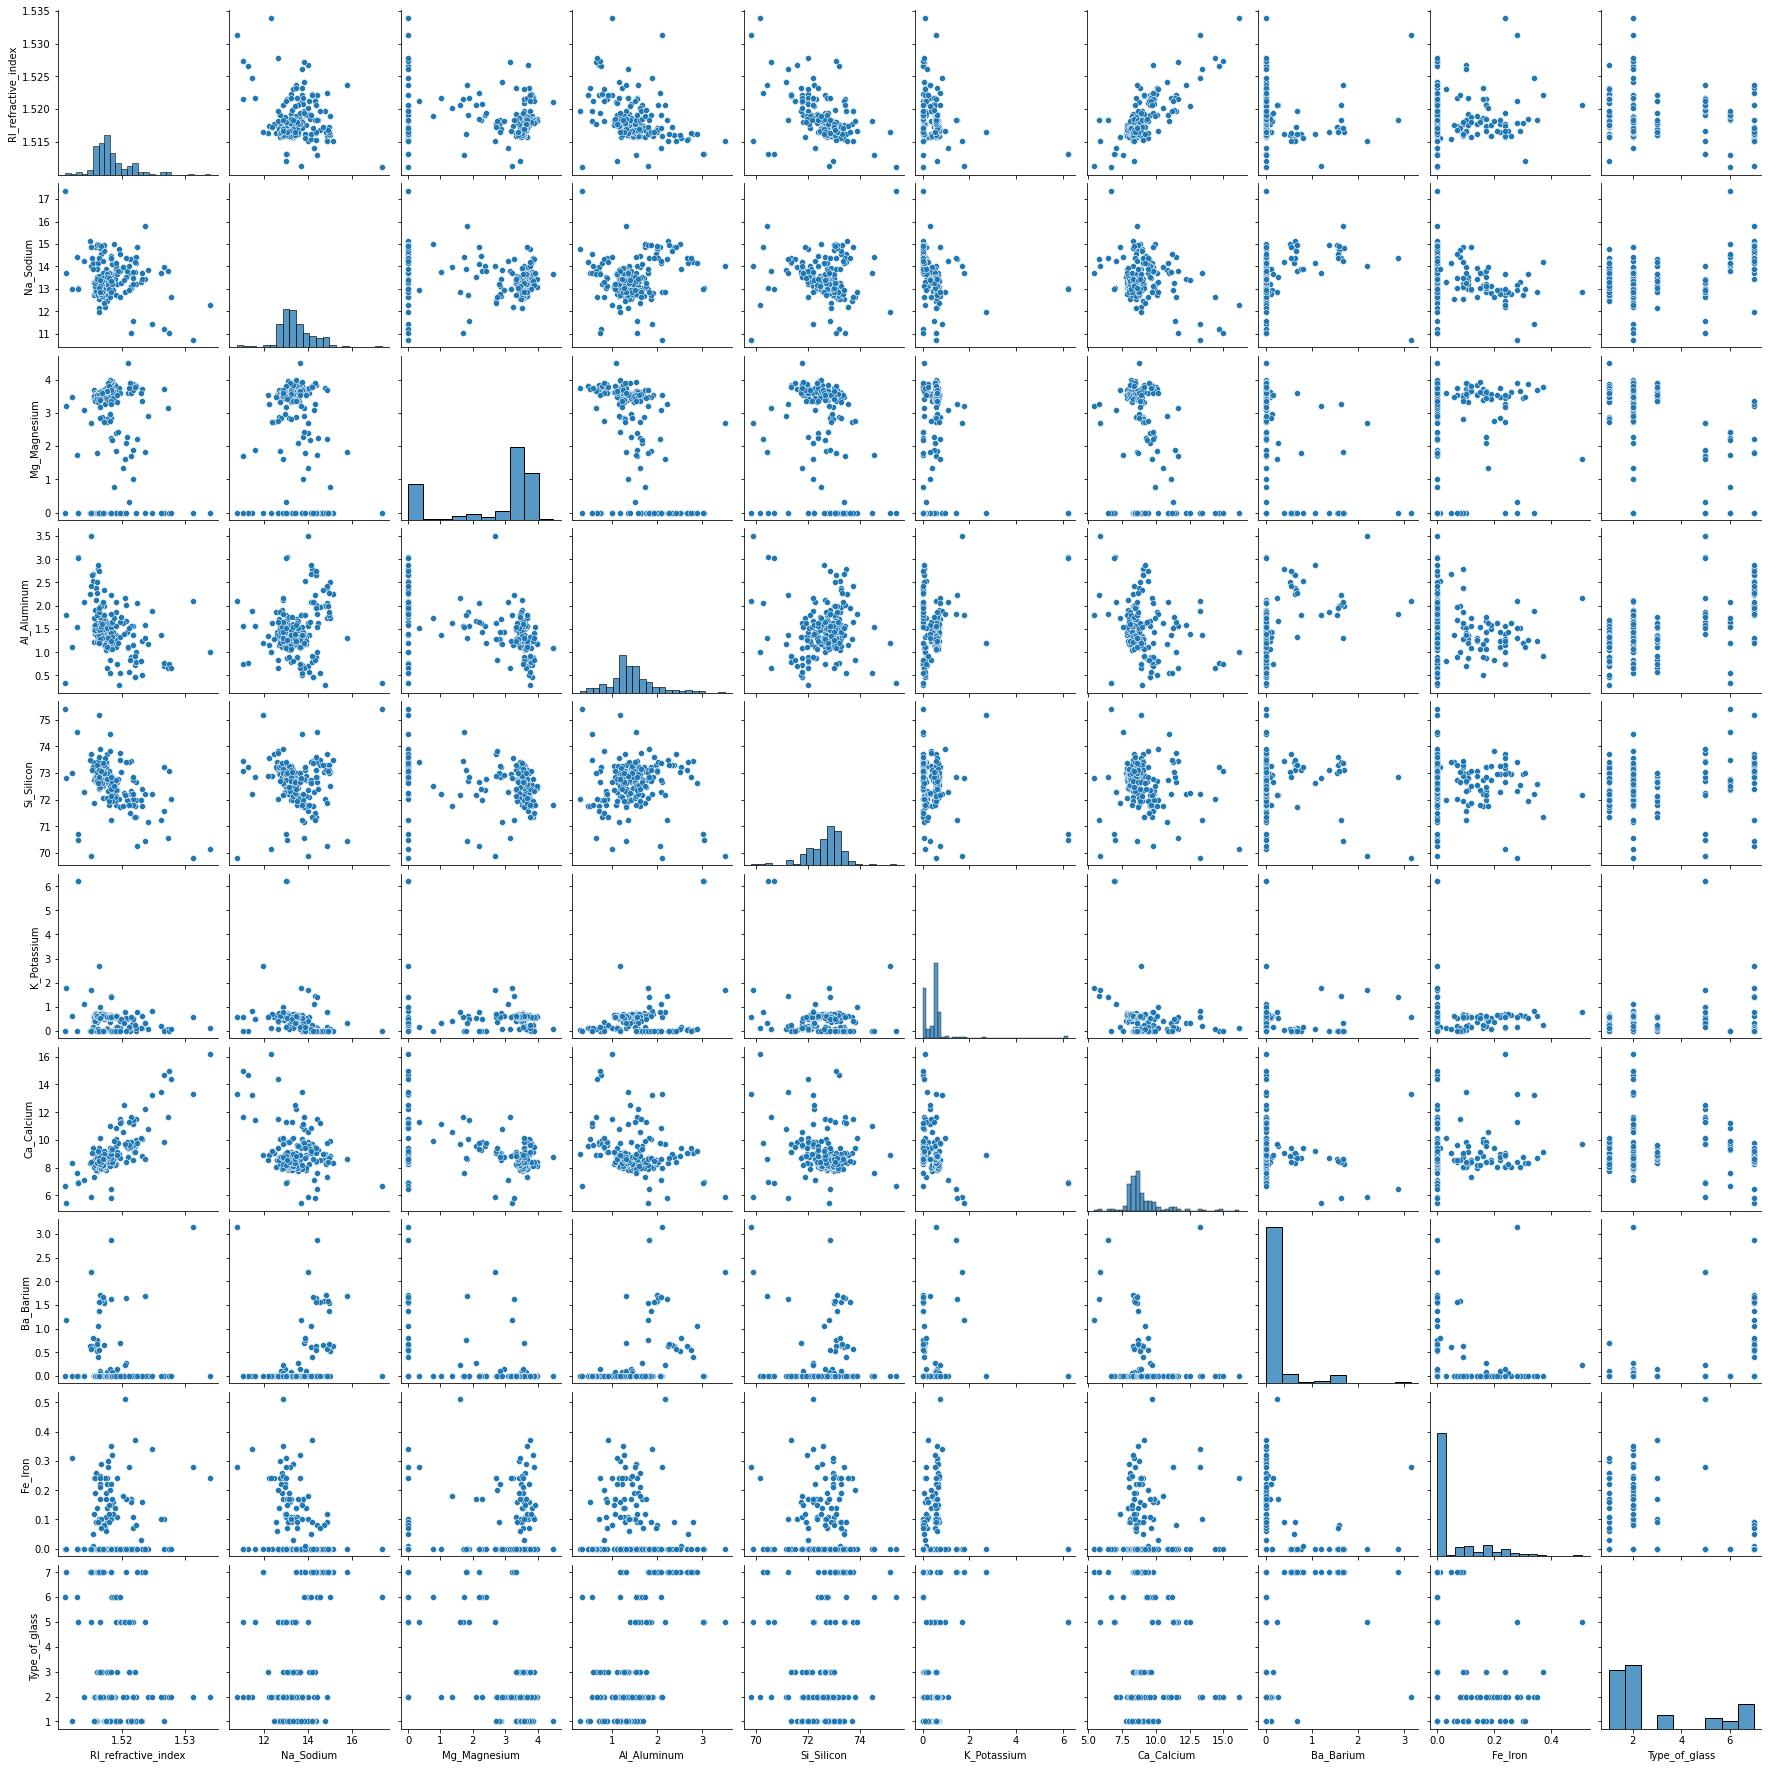

In [122]:
sns.pairplot(df)

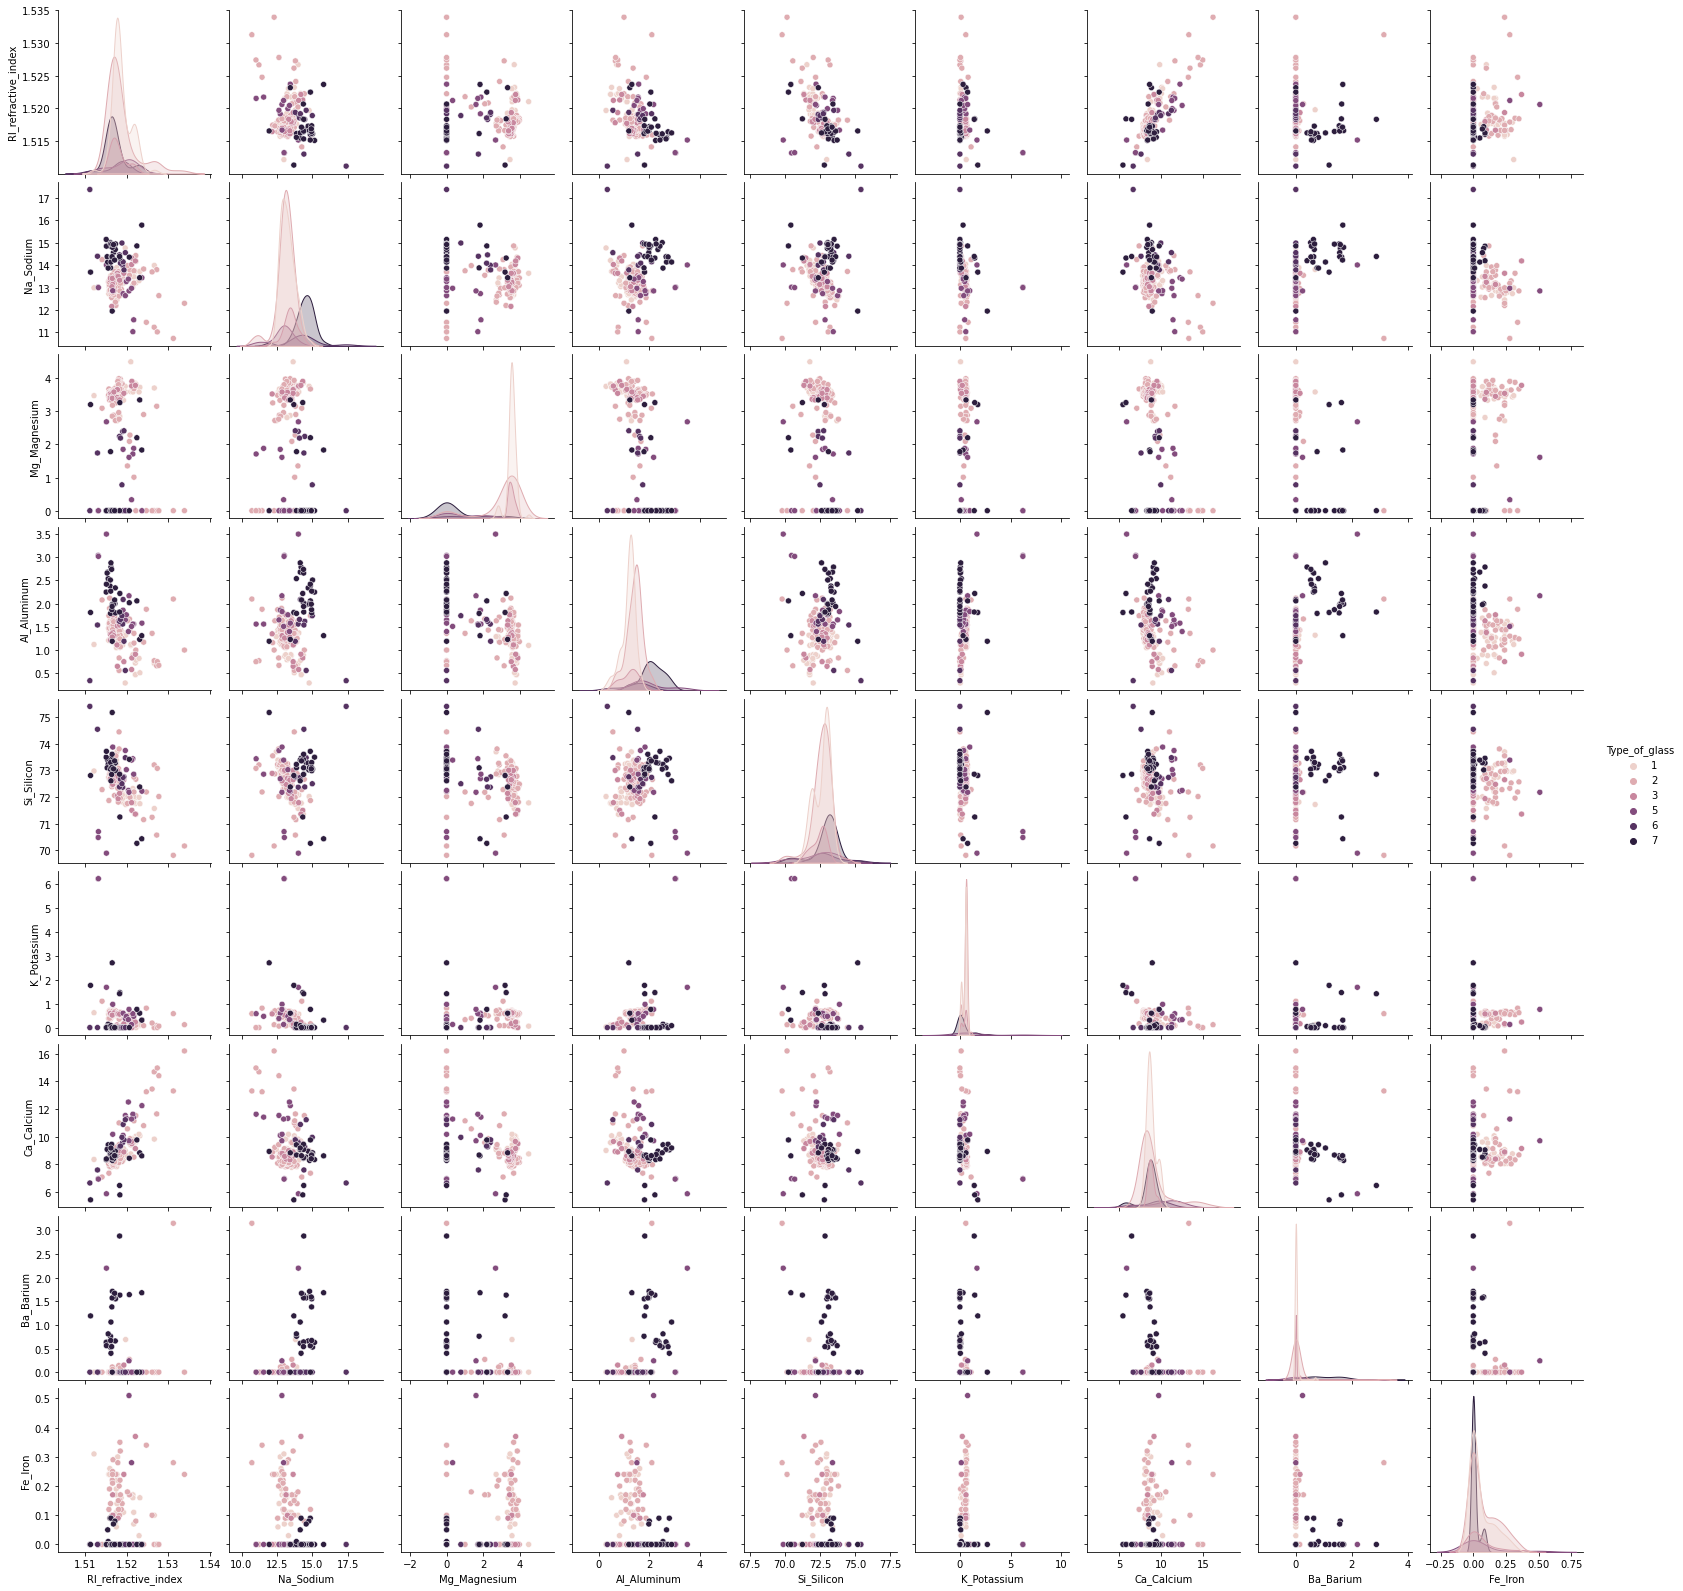

In [123]:
sns.pairplot(data=df, hue='Type_of_glass')

# Correlation between target variable and independent variables

In [124]:
cor=df.corr()

<AxesSubplot:>

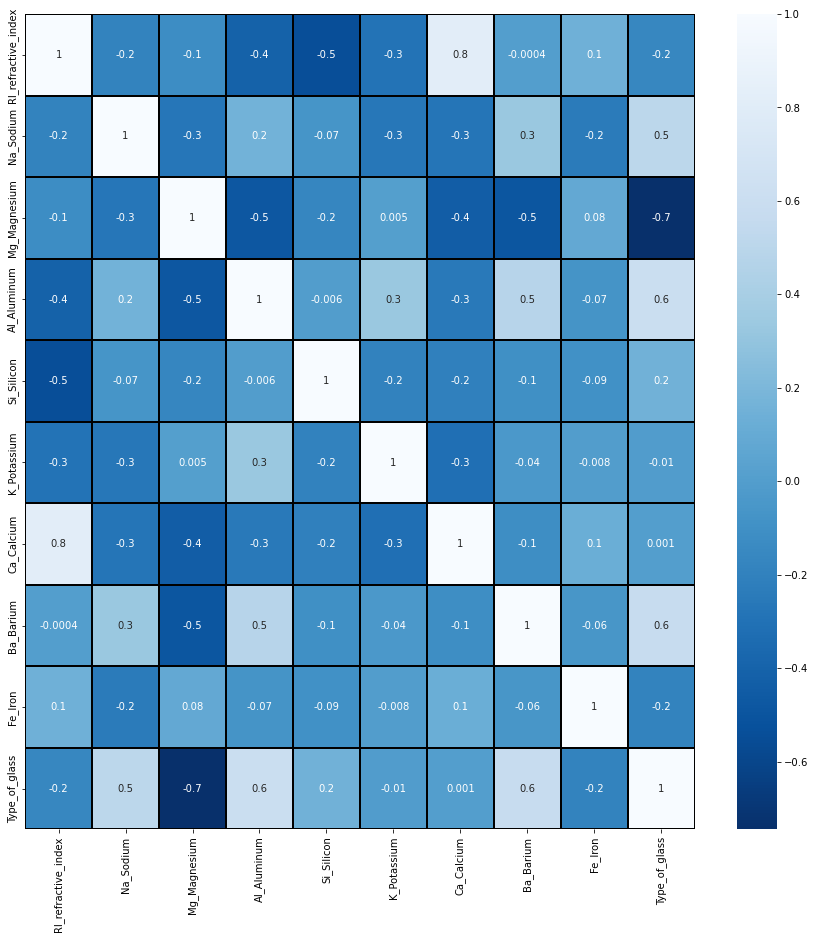

In [125]:
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, linewidths=0.1, fmt='.1g', linecolor='black', cmap='Blues_r')

observations=


1. This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between input and target.    This heatmap contains both positive and negative correlation.


2. light shades are highly correlated.


3. Ba_Barium is highly correlated with Type_of_glass


4. Mg_Magnesium negatively correlated with Type_of_glass

In [126]:
cor['Type_of_glass'].sort_values(ascending=False)

Type_of_glass          1.000000
Al_Aluminum            0.598829
Ba_Barium              0.575161
Na_Sodium              0.502898
Si_Silicon             0.151565
Ca_Calcium             0.000952
K_Potassium           -0.010054
RI_refractive_index   -0.164237
Fe_Iron               -0.188278
Mg_Magnesium          -0.744993
Name: Type_of_glass, dtype: float64

We can observe the positive and negative correlated features with the target

# Visualizing the correlation between label and features using bar plot

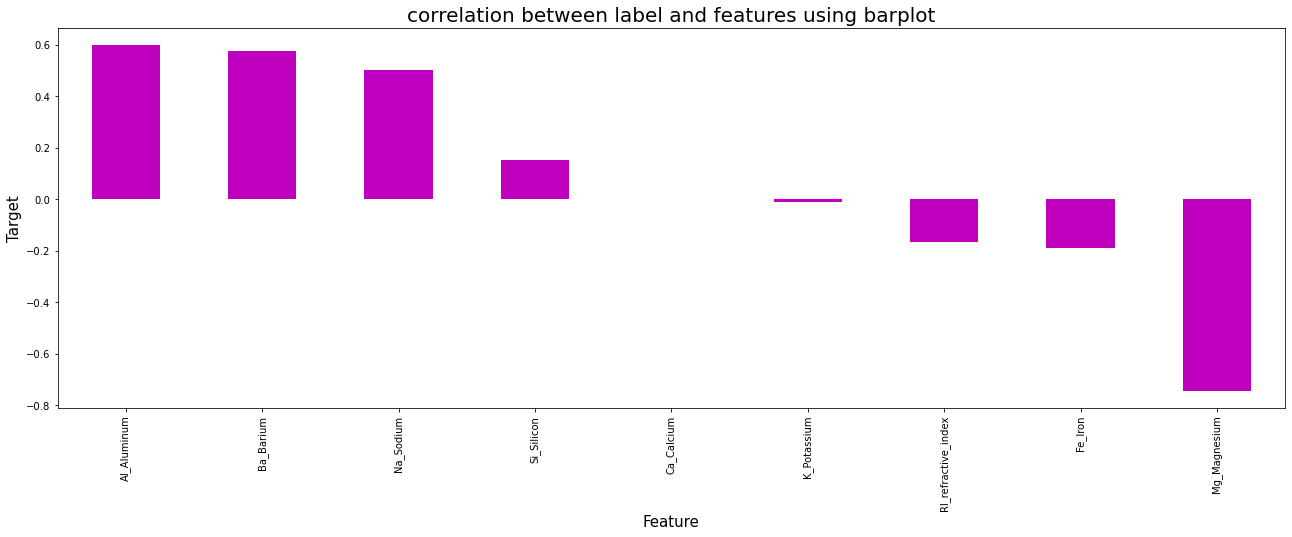

In [127]:
plt.figure(figsize=(22,7))
df.corr()['Type_of_glass'].sort_values(ascending=False).drop(['Type_of_glass']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("correlation between label and features using barplot",fontsize=20)
plt.show()

# Seprating features and label

In [128]:
x=df.drop('Type_of_glass', axis=1)
x

,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [129]:
x.shape

(214, 9)

In [130]:
y=df['Type_of_glass'].apply(lambda y_value: 1 if y_value>=5 else 0)
y

0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: Type_of_glass, Length: 214, dtype: int64

In [131]:
y.shape

(214,)

# Feature Scalling Using Standard Scalarization

In [132]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


We have scaled the data using standard scalarization method to overcome the issue of biasness standard scaler will convert mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

# Checking Variance Inflation factor(VIF)

In [133]:
#Finding varience inflation factor in each column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,9.504579,RI_refractive_index
1,61.789643,Na_Sodium
2,207.841338,Mg_Magnesium
3,25.682696,Al_Aluminum
4,58.176725,Si_Silicon
5,43.620777,K_Potassium
6,211.427466,Ca_Calcium
7,26.135301,Ba_Barium
8,1.218039,Fe_Iron


In [134]:
y.value_counts()

0    163
1     51
Name: Type_of_glass, dtype: int64

Here we can see that the data is not balanced since it is a classification problem we will balance the data using oversampling method

# Oversampling

In [135]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [136]:
#checking value count of target column
y.value_counts()

0    163
1    163
Name: Type_of_glass, dtype: int64

Here we can see that the data is balanced and now we can use further machine learning model

# Modeling

# For the best random state

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccuracy=0
maxRandomState=0

for i in range(1,500):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
        
print('Best accuracy is', maxAccuracy, 'at random_state', maxRandomState)

Best accuracy is 1.0 at random_state 45


# Split the data into train test split

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=maxRandomState)

In [139]:
x_train

,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron
267,0.349447,0.629038,-0.474227,-0.725826,0.298844,-0.763919,0.745481,-0.352877,-0.586451
275,-0.760065,0.934487,-1.865511,2.438783,0.455131,-0.677496,0.335937,0.954329,-0.545133
205,-0.345051,1.892920,-1.865511,0.712893,0.438787,-0.763919,-0.244370,2.771769,-0.586451
219,1.426798,1.993609,-0.384268,0.956350,-3.053429,0.276184,0.415764,0.273593,-0.586451
154,-0.470473,-0.672462,0.622270,-0.270841,-0.052974,0.173582,-0.117594,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
163,-1.064580,0.739112,-0.003150,4.125851,-3.572943,1.818050,-2.174186,4.082105,-0.586451
213,-0.414363,1.009152,-1.865511,1.275028,0.917606,-0.763919,-0.237327,3.013677,-0.586451
95,0.077425,-0.058734,0.518033,-0.029927,-0.505911,0.019893,-0.251413,-0.352877,-0.586451
32,-0.203125,-0.684737,0.552779,-0.431451,0.412905,0.173582,-0.279586,-0.171446,1.676673


In [140]:
x_test

,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron
69,1.529685,-0.120107,0.622270,-1.254576,-0.855320,-0.579492,0.854357,-0.352877,-0.277843
47,2.741002,0.714563,0.705659,-1.475414,-1.398844,-0.733181,0.607848,-0.352877,0.442242
249,1.058799,-2.712718,-0.639807,0.231064,0.783473,0.073946,1.828778,-0.352877,-0.586451
145,0.008113,-0.684737,0.684812,-0.411375,-0.104738,0.188951,-0.195068,-0.352877,3.013973
298,0.579123,1.886901,-0.982638,0.814342,-1.196602,-0.360467,0.653186,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
276,-0.792797,1.051261,-1.865511,2.544703,0.578748,-0.707418,0.224261,0.800557,-0.350087
308,0.582389,-0.643927,-0.857408,0.712019,-0.080726,0.065331,1.124854,-0.352877,-0.586451
25,-0.239432,-0.525167,0.594473,-0.471604,0.451728,0.235057,-0.300715,-0.352877,-0.586451
8,0.268859,0.775936,0.622270,-0.150384,-0.738850,0.096738,-0.462707,-0.352877,-0.586451


In [141]:
y_train

267    1
275    1
205    1
219    1
154    0
      ..
163    1
213    1
95     0
32     0
131    0
Name: Type_of_glass, Length: 228, dtype: int64

In [142]:
y_test

69     0
47     0
249    1
145    0
298    1
      ..
276    1
308    1
25     0
8      0
46     0
Name: Type_of_glass, Length: 98, dtype: int64

# Importing various classification libraries

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier,RandomForestClassifier
from sklearn.linear_model import Lasso,Ridge

# DecisionTree Classifier

In [144]:
#checking accuracy for DecisionTreeclassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)
predDTC=DTC.predict(x_test)
print('Accuracy Score',accuracy_score(y_test, predDTC))
print('Confusion Matrix',confusion_matrix(y_test, predDTC))
print('Classification Report',classification_report(y_test,predDTC))

Accuracy Score 0.9591836734693877
Confusion Matrix [[44  2]
 [ 2 50]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.96      0.96      0.96        52

    accuracy                           0.96        98
   macro avg       0.96      0.96      0.96        98
weighted avg       0.96      0.96      0.96        98



# Support Vector Classifier

In [145]:
#checking accuracy for support vector machine classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predsvc))
print('Confusion Matrix', confusion_matrix(y_test,predsvc))
print('Classification Report', classification_report(y_test,predsvc))

Accuracy Score 1.0
Confusion Matrix [[46  0]
 [ 0 52]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        52

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



# K-Neighbors Classifier

In [146]:
#checking accuracy for support k-Neighbors classifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN= KNN.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predKNN))
print('Confusion Matrix', confusion_matrix(y_test,predKNN))
print('Classification Report', classification_report(y_test,predKNN))

Accuracy Score 0.9795918367346939
Confusion Matrix [[44  2]
 [ 0 52]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.96      1.00      0.98        52

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



# Random Forest Classifier

In [147]:
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC=RFC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test, predRFC))
print('Confusion Matrix', confusion_matrix(y_test, predRFC))
print('Classification Report', classification_report(y_test,predRFC))

Accuracy Score 1.0
Confusion Matrix [[46  0]
 [ 0 52]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        52

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



# Gradient Boosting Classifier

In [148]:
#checking accuracy for gradient boosting classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predGB))
print('Confusion Matrix', confusion_matrix(y_test,predGB))
print('Classification Report', classification_report(y_test,predGB))

Accuracy Score 1.0
Confusion Matrix [[46  0]
 [ 0 52]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        52

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



# AdaBoost Classifier

In [149]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC=ABC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predABC))
print('Confusion Matrix', confusion_matrix(y_test,predABC))
print('Classification Report', classification_report(y_test,predABC))

Accuracy Score 1.0
Confusion Matrix [[46  0]
 [ 0 52]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        52

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



# Bagging Classifier

In [150]:
#checking accuracy for Bagging classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predBC))
print('Confusion Matrix', confusion_matrix(y_test,predBC))
print('Classification Report', classification_report(y_test,predBC))

Accuracy Score 0.9897959183673469
Confusion Matrix [[46  0]
 [ 1 51]]
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        52

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



# ExtraTreeClassifier

In [151]:
#checking accuracy for ExtraTreeClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predET))
print('Confusion Matrix', confusion_matrix(y_test,predET))
print('Classification Report', classification_report(y_test,predET))

Accuracy Score 1.0
Confusion Matrix [[46  0]
 [ 0 52]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        52

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



# Cross Validation Score

In [152]:
#using k-fold cross validation for decision tree classifier 
cvscore=cross_val_score(DTC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predDTC) - cvscore.mean())

[0.95454545 0.95384615 0.98461538 0.86153846 0.95384615]
0.9416783216783218
Difference between Accuracy score and cross validation score is - 0.017505351791065937


In [153]:
#using k-fold cross validation for support vector classifier
cvscore=cross_val_score(svc,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predsvc) - cvscore.mean())

[0.98484848 1.         0.98461538 0.83076923 0.95384615]
0.9508158508158508
Difference between Accuracy score and cross validation score is - 0.04918414918414915


In [154]:
#Using k-fold cross validation for K-Neighbour Classifier

cvscore=cross_val_score(KNN,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predKNN) - cvscore.mean())

[0.95454545 0.98461538 0.98461538 0.83076923 0.93846154]
0.9386013986013987
Difference between Accuracy score and cross validation score is - 0.04099043813329517


In [155]:
#Using k-fold cross validation for Random Forest Classifier

cvscore=cross_val_score(RFC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predRFC) - cvscore.mean())

[0.96969697 1.         0.98461538 0.81538462 0.95384615]
0.9447086247086247
Difference between Accuracy score and cross validation score is - 0.05529137529137529


In [156]:
#using k-fold cross validation for gradient boosting classifier
cvscore=cross_val_score(GB,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predGB) - cvscore.mean())

[0.95454545 1.         0.98461538 0.86153846 0.95384615]
0.9509090909090909
Difference between Accuracy score and cross validation score is - 0.049090909090909074


In [157]:
#using k-fold cross validation for Adaboosting classifier
cvscore=cross_val_score(ABC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predABC) - cvscore.mean())

[0.95454545 0.96923077 0.93846154 0.83076923 0.95384615]
0.9293706293706293
Difference between Accuracy score and cross validation score is - 0.07062937062937069


In [158]:
#using k-fold cross validation for Bagging classifier
cvscore=cross_val_score(BC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predBC) - cvscore.mean())

[0.93939394 0.96923077 0.98461538 0.78461538 0.95384615]
0.9263403263403264
Difference between Accuracy score and cross validation score is - 0.06345559202702056


In [159]:
#using k-fold cross validation for ExtraTrees classifier
cvscore=cross_val_score(ET,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predET) - cvscore.mean())

[0.96969697 1.         0.98461538 0.81538462 0.95384615]
0.9447086247086247
Difference between Accuracy score and cross validation score is - 0.05529137529137529


# Hyper parameter Tuning

In [160]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion': ['gini','entropy'],
            'random_state': [10,50,1000],
            'max_depth': [0,10,20],
            'n_jobs': [-2,-1,1],
            'n_estimators': [50,100,200,300]}

In [161]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [162]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [163]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 50}

In [164]:
Final_model=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=50, n_jobs=-2, random_state=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


# plotting ROC and compare AUC for all the models used

In [169]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

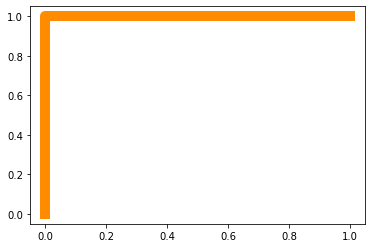

In [170]:
from sklearn.metrics import auc
fpr,tpr,threshold= roc_curve(pred,y_test)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=10, label='ROC curve(area=%0.2f)' %roc_auc)

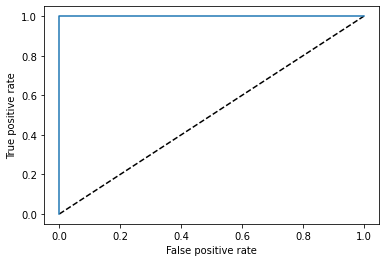

Auc score:
 1.0


In [171]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label= 'Random Forest Classifier(area=%0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score=roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc score:' '\n', auc_score)

Here we can see area under curve for each model used

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 100%

# Saving the model

In [173]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model, "glass_identification.pkl")

['glass_identification.pkl']

# predicting the save model

In [174]:
#Lets Load the saved model and get the prediction
model=joblib.load("glass_identification.pkl")

#prediction
prediction=model.predict(x_test)
prediction

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [175]:
a=np.array(y_test)
df=pd.DataFrame()
df["predicted"]=prediction
df['original']=a
df

,predicted,original
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
93,1,1
94,1,1
95,0,0
96,0,0
